In [1]:
import comet_ml

import os
os.environ["COMET_API_KEY"] = "I5AiXfuD0TVuSz5UOtujrUM9i"

PROJECT_NAME="robust-training"
WORKSPACE_NAME="maxheuillet"

# Get all Experiemnts in workspace
api = comet_ml.API()

# all_experiments_in_workspace = api.get_experiments(WORKSPACE_NAME)
all_experiments_in_project = api.get_experiments(WORKSPACE_NAME, PROJECT_NAME)


In [6]:
# Convert the experiment summary to an APIExperiment using the experiment key
from tqdm.notebook import tqdm

data = {}
for i in tqdm( range(len(all_experiments_in_project)) ):
    summary = all_experiments_in_project[i].get_parameters_summary()

    d = {}
    for e in summary:
        if e['name'] in [ 'exp', 'dataset', 'pre_trained', 'run_id', 'arch','aug','sched', 'batch_size','init_lr','sched','pruning_strategy','pruning_ratio','loss_function','iterations']:
            if e['name'] == 'run_id':
                id = e['valueMax']
            else:
                d[e['name']] = e['valueMax']
        
    if id not in data.keys() or data[id][ 'adv_acc' ] is None:
        try:
            adv_acc  = all_experiments_in_project[i].get_metrics('final_robust_accuracy')[0]
            d[ 'adv_acc' ] = adv_acc['metricValue']
            nat_acc = all_experiments_in_project[i].get_metrics('final_clean_accuracy')[0]
            d[ 'nat_acc' ] = nat_acc['metricValue']
        except:
            d[ 'adv_acc' ] = None
            d[ 'nat_acc' ] = None

        data[id] = d

data

  0%|          | 0/2460 [00:00<?, ?it/s]

{'51918100': {'arch': 'convnext',
  'aug': 'aug',
  'batch_size': '1042',
  'dataset': 'CIFAR10',
  'exp': 'RQ1',
  'init_lr': '0.001',
  'iterations': '50',
  'loss_function': 'TRADES_v2',
  'pre_trained': 'imagenet1k_non_robust',
  'pruning_ratio': '0.0',
  'pruning_strategy': 'random',
  'sched': 'nosched',
  'adv_acc': '0.5064',
  'nat_acc': '0.8229'},
 '51918108': {'arch': 'convnext',
  'aug': 'aug',
  'batch_size': '1042',
  'dataset': 'CIFAR10',
  'exp': 'RQ1',
  'init_lr': '0.001',
  'iterations': '50',
  'loss_function': 'APGD',
  'pre_trained': 'imagenet21k_non_robust',
  'pruning_ratio': '0.0',
  'pruning_strategy': 'random',
  'sched': 'nosched',
  'adv_acc': '0.2601',
  'nat_acc': '0.4524'},
 '51918104': {'arch': 'convnext',
  'aug': 'aug',
  'batch_size': '1042',
  'dataset': 'CIFAR10',
  'exp': 'RQ1',
  'init_lr': '0.01',
  'iterations': '50',
  'loss_function': 'TRADES_v2',
  'pre_trained': 'imagenet1k_robust',
  'pruning_ratio': '0.0',
  'pruning_strategy': 'random',
 

In [7]:
data['36242610']

{'arch': 'convnext',
 'aug': 'aug',
 'batch_size': '64',
 'dataset': 'Aircraft',
 'exp': 'RQ1',
 'init_lr': '0.0001',
 'iterations': '50',
 'loss_function': 'TRADES_v2',
 'pre_trained': 'imagenet21k_non_robust',
 'pruning_ratio': '0.0',
 'pruning_strategy': 'random',
 'sched': 'nosched',
 'adv_acc': '0.0006000600060006001',
 'nat_acc': '0.05490549054905491'}

In [1]:
import pandas as pd

df = pd.read_csv("./results/past_results_narval_RQ1.csv",header=0)
df

,arch,pre_trained,lora,dataset,pruning_strategy,pruning_ratio,batch_strategy,aug,iterations,delta,...,step_size,perturb_steps,beta,distance,unsup_fraction,exp,timestamp,clean_acc,robust_acc,id
0,convnext,imagenet21k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/12/11/40,0.438344,0.044404,5664202db4c5b34f7c7f9179380743ef
1,convnext,imagenet1k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/12/45/07,0.371437,0.102910,371fbd97c3d090f06a64f0e043037ba0
2,convnext,imagenet21k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/12/55/54,0.040504,0.000000,1202df016214a81a70ee07ce8a453592
3,convnext,imagenet1k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/13/30/41,0.249925,0.033603,df10c8cd8a061b55554d29ea7b0af944
4,convnext,imagenet1k_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/13/31/27,0.087009,0.017402,d765cc0bbdee9a6f39c833c09c355c6f
5,convnext,imagenet1k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/13/34/39,0.014701,0.007501,f5a152a4b280e66e01e93b0235c384c0
6,convnext,imagenet1k_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/14/07/13,0.243324,0.092709,4b870b633ee2d2d7fde5d5e74e9bdab0
7,convnext,imagenet21k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/14/09/04,0.009301,0.000300,442ed1b4c5c94bbf297855f1ef4dc3de
8,convnext,imagenet1k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/14/45/10,0.009901,0.009901,316bda6c88de48eb48ef49e0020859c5
9,convnext,imagenet21k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/15/21/48,0.614761,0.160816,11619fbd93386b105c1a3d0b62c1c724


In [4]:
df.dtypes

arch                 object
pre_trained          object
lora                 object
dataset              object
pruning_strategy     object
pruning_ratio       float64
batch_strategy       object
aug                  object
iterations            int64
delta                 int64
batch_size            int64
sample_size           int64
loss_function        object
init_lr             float64
sched                object
momentum            float64
weight_decay        float64
seed                  int64
log_dir              object
statedict_dir        object
data_dir             object
task                 object
num_workers           int64
epsilon             float64
step_size           float64
perturb_steps         int64
beta                float64
distance             object
unsup_fraction      float64
exp                  object
timestamp            object
clean_acc           float64
robust_acc          float64
id                   object
dtype: object

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Assuming 'data' is already defined or loaded
# df = pd.DataFrame( data ).T


# df['run_id'] = data.keys()
# df['run_id'] = pd.to_numeric(df['run_id'])

# # df[ df.run_id == 36242610 ]


# df['adv_acc'] = pd.to_numeric(df['adv_acc'], errors='coerce')
# df['nat_acc'] = pd.to_numeric(df['nat_acc'], errors='coerce')
# df['aug'] = df['aug'].fillna('aug')

exp = ['RQ1']
pruning_ratio = 0.0
dataset = [ 'Aircraft', 'CIFAR100', 'CIFAR10' ] #, 'CIFAR10'  'CIFAR10',
batch_size = 64
aug = 'aug'
sched = 'nosched'

init_lr = [ 0.001, 0.0005, 0.0001 ] #0.0001 0.0005 0.001
# pre_trained = ['imagenet21k_non_robust', 'imagenet1k_non_robust', 'imagenet1k_robust']

# Apply filtering

df = df[
    (df['exp'].isin(exp)) &
    (df['dataset'].isin(dataset)) &
    (df['pruning_ratio'] == pruning_ratio) &
    #(df['run_id'] >= 36242610) & (df['run_id'] <= 36242627) &
    (df['batch_size'] == batch_size) &
    (df['aug'] == aug) &
    (df['sched'] == sched) &
    (df['init_lr'].isin(init_lr))
]

df

# # # Assuming the dataframe 'df' is already loaded
# # # Group by all columns except 'adv_acc', 'nat_acc'
# # group_columns = [  'exp', 'arch', 'batch_size', 'dataset', 'init_lr', 'iterations', 
# #                  'loss_function', 'pruning_ratio', 'pruning_strategy', 
# #                  'sched', 'aug', 'pre_trained', 'run_id']

# # # Group by the relevant columns and calculate the mean of 'adv_acc' and 'nat_acc'
# # df_avg = df.groupby(group_columns).agg({'adv_acc': 'mean', 'nat_acc': 'mean'}).reset_index()

# # # Display the averaged DataFrame
# # df_avg

# df.head(50)


,arch,pre_trained,lora,dataset,pruning_strategy,pruning_ratio,batch_strategy,aug,iterations,delta,...,step_size,perturb_steps,beta,distance,unsup_fraction,exp,timestamp,clean_acc,robust_acc,id
0,convnext,imagenet21k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/12/11/40,0.438344,0.044404,5664202db4c5b34f7c7f9179380743ef
1,convnext,imagenet1k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/12/45/07,0.371437,0.102910,371fbd97c3d090f06a64f0e043037ba0
2,convnext,imagenet21k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/12/55/54,0.040504,0.000000,1202df016214a81a70ee07ce8a453592
3,convnext,imagenet1k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/13/30/41,0.249925,0.033603,df10c8cd8a061b55554d29ea7b0af944
4,convnext,imagenet1k_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/13/31/27,0.087009,0.017402,d765cc0bbdee9a6f39c833c09c355c6f
5,convnext,imagenet1k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/13/34/39,0.014701,0.007501,f5a152a4b280e66e01e93b0235c384c0
6,convnext,imagenet1k_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/14/07/13,0.243324,0.092709,4b870b633ee2d2d7fde5d5e74e9bdab0
7,convnext,imagenet21k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/14/09/04,0.009301,0.000300,442ed1b4c5c94bbf297855f1ef4dc3de
8,convnext,imagenet1k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/14/45/10,0.009901,0.009901,316bda6c88de48eb48ef49e0020859c5
9,convnext,imagenet21k_non_robust,nolora,Aircraft,random,0.0,random,aug,50,1,...,0.007843,10,1.0,l_inf,0.3,RQ1,24/10/27/15/21/48,0.614761,0.160816,11619fbd93386b105c1a3d0b62c1c724


In [3]:
import pandas as pd

# Create a new column that combines loss_function and init_lr
df['loss_lr'] = df['loss_function'] + '_' + df['init_lr'].astype(str)

# Group by 'pre_trained', 'loss_lr', and 'dataset', and calculate mean clean and robust accuracy
grouped_df = df.groupby(['pre_trained', 'loss_function','init_lr', 'dataset']).agg(
    mean_clean_accuracy=('clean_acc', 'mean'),
    mean_robust_accuracy=('robust_acc', 'mean')
).reset_index()

# Pivot the DataFrame to have 'dataset' as the top-level column
pivot_df = grouped_df.pivot(
    index=['pre_trained', 'loss_function','init_lr'],
    columns='dataset',
    values=['mean_clean_accuracy', 'mean_robust_accuracy']
)

# Reorder the column levels to have 'dataset' on top
pivot_df = pivot_df.swaplevel(axis=1).sort_index(axis=1)

# Display the resulting DataFrame
pivot_df.head(20)


dataset                                                 Aircraft  \
                                             mean_clean_accuracy   
pre_trained            loss_function init_lr                       
imagenet1k_non_robust  APGD          0.0001             0.010801   
                                     0.0005             0.009901   
                                     0.0010             0.009901   
                       TRADES_v2     0.0001             0.249925   
                                     0.0005             0.371437   
                                     0.0010             0.014701   
imagenet1k_robust      APGD          0.0001             0.009601   
                                     0.0005             0.016502   
                                     0.0010             0.018302   
                       TRADES_v2     0.0001             0.087009   
                                     0.0005             0.243324   
                                     0.0010             0.301830   
imagenet21k_non_robust APGD          0.0001             0.010501   
                                     0.0005             0.009301   
                                     0.0010             0.018602   
                       TRADES_v2     0.0001             0.040504   
                                     0.0005             0.438344   
                                     0.0010             0.614761   

dataset                                                            \
                                             mean_robust_accuracy   
pre_trained            loss_function init_lr                        
imagenet1k_non_robust  APGD          0.0001              0.007801   
                                     0.0005              0.009901   
                                     0.0010              0.009901   
                       TRADES_v2     0.0001              0.033603   
                                     0.0005              0.102910   
                                     0.0010              0.007501   
imagenet1k_robust      APGD          0.0001              0.000300   
                                     0.0005              0.003300   
                                     0.0010              0.009901   
                       TRADES_v2     0.0001              0.017402   
                                     0.0005              0.092709   
                                     0.0010              0.140114   
imagenet21k_non_robust APGD          0.0001              0.000000   
                                     0.0005              0.000300   
                                     0.0010              0.000600   
                       TRADES_v2     0.0001              0.000000   
                                     0.0005              0.044404   
                                     0.0010              0.160816   

dataset                                                  CIFAR10  \
                                             mean_clean_accuracy   
pre_trained            loss_function init_lr                       
imagenet1k_non_robust  APGD          0.0001               0.6258   
                                     0.0005               0.6140   
                                     0.0010               0.6514   
                       TRADES_v2     0.0001               0.8448   
                                     0.0005               0.8721   
                                     0.0010               0.8528   
imagenet1k_robust      APGD          0.0001               0.5566   
                                     0.0005               0.6363   
                                     0.0010               0.6769   
                       TRADES_v2     0.0001               0.7470   
                                     0.0005               0.8230   
                                     0.0010               0.8345   
imagenet21k_non_robust APGD          0.0001               0.5496   
                                 

In [27]:
pivot_df.to_csv("./results/results_narval_RQ1_pivot.csv")

In [23]:
import pandas as pd

# Replace underscores with spaces in column names (multi-level columns)
# pivot_df.columns = pd.MultiIndex.from_tuples(
#     [(str(col[0]).replace('_', ' '), str(col[1]).replace('_', ' ')) for col in pivot_df.columns]
# )

# # Replace underscores with spaces in data values
# pivot_df = pivot_df.replace('_', ' ', regex=True)

# Generate LaTeX code from the pivoted DataFrame
latex_code = pivot_df.to_latex(
    multirow=True,         # Enable multi-row display for column headers
    multicolumn=True,      # Enable multi-column display for index headers
    multicolumn_format='c',# Center-align multi-column headers
    column_format='l' + 'c' * (len(pivot_df.columns)), # Adjust column alignment
    na_rep='-',            # Replace NaN with '-'
    caption='Mean Clean and Robust Accuracy by Dataset, Pre-trained Model, and Loss Function',
    label='tab:mean_accuracy'
)

# Print the generated LaTeX code
print(latex_code)


\begin{table}
\caption{Mean Clean and Robust Accuracy by Dataset, Pre-trained Model, and Loss Function}
\label{tab:mean_accuracy}
\begin{tabular}{lcccccc}
\toprule
 &  & dataset & \multicolumn{2}{c}{Aircraft} & \multicolumn{2}{c}{CIFAR10} & \multicolumn{2}{c}{CIFAR100} \\
 &  &  & mean_clean_accuracy & mean_robust_accuracy & mean_clean_accuracy & mean_robust_accuracy & mean_clean_accuracy & mean_robust_accuracy \\
pre_trained & loss_function & init_lr &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{imagenet1k_non_robust} & \multirow[t]{3}{*}{APGD} & 0.000100 & 0.010801 & 0.007801 & - & - & 0.144700 & 0.089500 \\
 &  & 0.000500 & 0.009901 & 0.009901 & - & - & 0.244400 & 0.143700 \\
 &  & 0.001000 & 0.009901 & 0.009901 & - & - & 0.300000 & 0.186900 \\
\cline{2-9}
 & \multirow[t]{3}{*}{TRADES_v2} & 0.000100 & 0.249925 & 0.033603 & 0.844800 & 0.556100 & 0.630500 & 0.289200 \\
 &  & 0.000500 & 0.371437 & 0.102910 & 0.872100 & 0.598100 & 0.641900 & 0.333200 \\
 &  & 0.001000 & 0.014701 & 0.

In [53]:
import pandas as pd

# Assuming df is your existing DataFrame

# Replace underscores with spaces in column names and data
pivot_df.columns = pivot_df.columns.str.replace('_', ' ')
df = df.replace('_', ' ', regex=True)

# Convert the DataFrame to LaTeX format with additional formatting
latex_code = df.to_latex(
    index=True,
    formatters={"name": str.upper},
    float_format="{:.1f}".format
)

# Print the LaTeX code
print(latex_code)


\begin{tabular}{lllllllllllllrrrll}
\toprule
 & arch & aug & batch size & dataset & exp & init lr & iterations & loss function & pre trained & pruning ratio & pruning strategy & sched & adv acc & nat acc & run id & combi & loss lr \\
\midrule
36242611 & convnext & aug & 64 & Aircraft & RQ1 & 0.0001 & 50 & TRADES v2 & imagenet1k non robust & 0.0 & random & nosched & 0.0 & 0.0 & 36242611 & imagenet1k non robust TRADES v2 & TRADES v2 0.0001 \\
36242612 & convnext & aug & 64 & Aircraft & RQ1 & 0.0001 & 50 & TRADES v2 & imagenet1k robust & 0.0 & random & nosched & 0.0 & 0.1 & 36242612 & imagenet1k robust TRADES v2 & TRADES v2 0.0001 \\
36242610 & convnext & aug & 64 & Aircraft & RQ1 & 0.0001 & 50 & TRADES v2 & imagenet21k non robust & 0.0 & random & nosched & 0.0 & 0.1 & 36242610 & imagenet21k non robust TRADES v2 & TRADES v2 0.0001 \\
36242614 & convnext & aug & 64 & Aircraft & RQ1 & 0.0005 & 50 & TRADES v2 & imagenet1k non robust & 0.0 & random & nosched & 0.0 & 0.0 & 36242614 & imagenet1

imagenet1k_non_robust


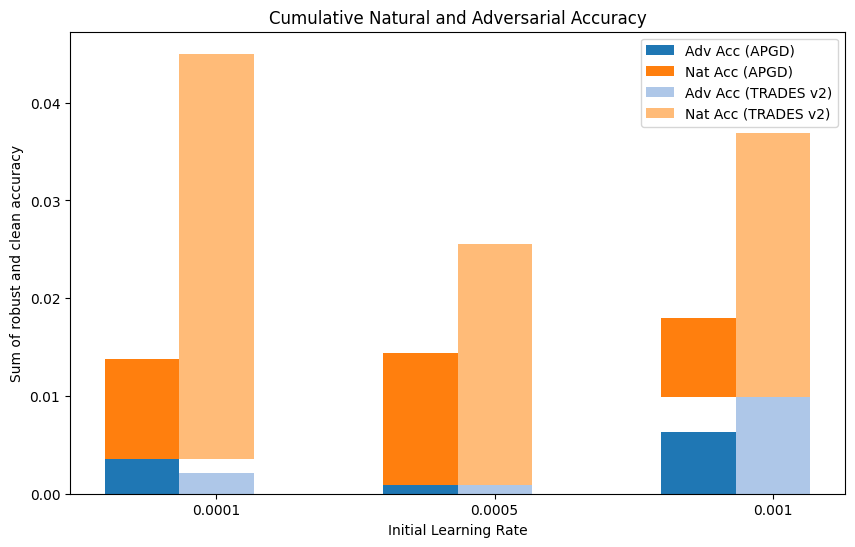

imagenet1k_robust


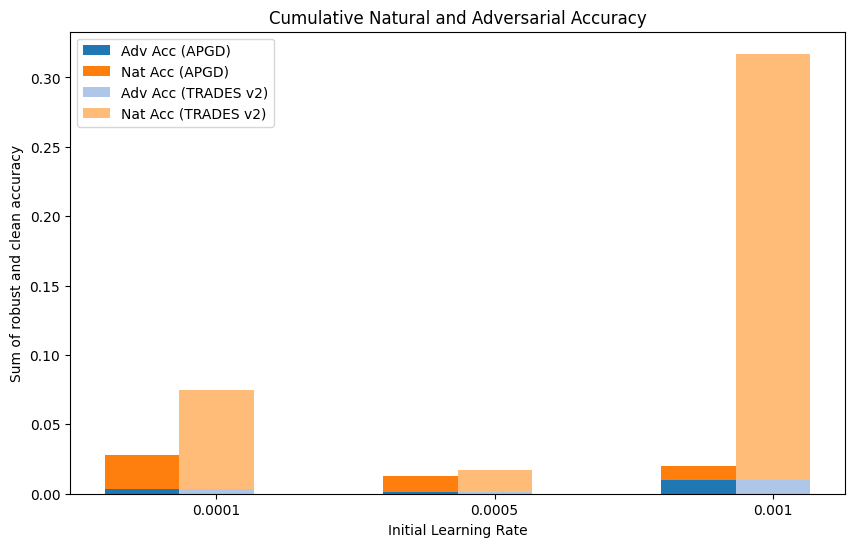

imagenet21k_non_robust


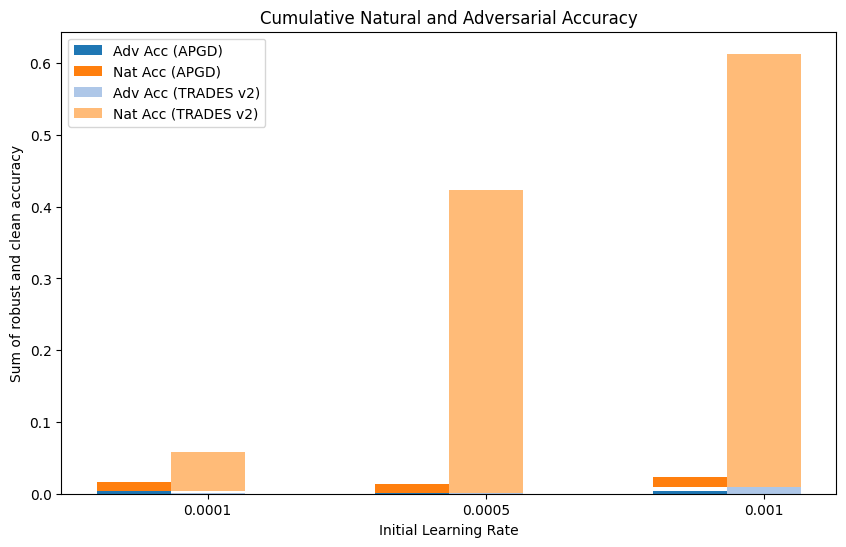

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



df['combi'] = df['pre_trained']+'_'+df['loss_function']
# Convert init_lr to string to use as x labels
df['init_lr'] = df['init_lr'].astype(str)

# Get unique values for init_lr and pre_trained
init_lr_values = df['init_lr'].unique()
pre_trained_values = df['pre_trained'].unique()

# x positions for each group
x = np.arange(len(init_lr_values))

# Width of a bar
total_width = 0.8
num_bars = len(pre_trained_values)
bar_width = total_width / num_bars



# Define colors for clarity
colors = { 'adv_acc': ['#1f77b4', '#aec7e8', ], 
           'nat_acc': ['#ff7f0e', '#ffbb78', ] }

# Plotting each bar
for pre_trained in pre_trained_values:

    fig, ax = plt.subplots(figsize=(10, 6))
    print(pre_trained)
    # Positions for each bar
    
    # Filter data for the current pre_trained type

    df_pre = df[ df['pre_trained'] == pre_trained ]

    adv_acc_apgd = [df_pre[ (df_pre['init_lr'] == lr) &  (df_pre['loss_function'] == 'APGD') ]['adv_acc'].values[0] for lr in init_lr_values]
    nat_acc_apgd = [df_pre[ (df_pre['init_lr'] == lr) &  (df_pre['loss_function'] == 'APGD') ]['nat_acc'].values[0] for lr in init_lr_values]

    adv_acc_tradesv2 = [df_pre[ (df_pre['init_lr'] == lr) & (df_pre['loss_function'] == 'TRADES_v2') ]['adv_acc'].values[0] for lr in init_lr_values]
    nat_acc_tradesv2 = [df_pre[ (df_pre['init_lr'] == lr) & (df_pre['loss_function'] == 'TRADES_v2') ]['nat_acc'].values[0] for lr in init_lr_values]
    # Plot the stacked bars

    positions = x - total_width/2 + bar_width/2 
    ax.bar(positions, adv_acc_apgd, bar_width, color=colors['adv_acc'][0], label=f'Adv Acc (APGD)')
    ax.bar(positions, nat_acc_apgd, bar_width, bottom=adv_acc, color=colors['nat_acc'][0], label=f'Nat Acc (APGD)')

    positions = x - total_width/2 + bar_width/2 + bar_width
    ax.bar(positions, adv_acc_tradesv2, bar_width, color=colors['adv_acc'][1], label=f'Adv Acc (TRADES v2)' )
    ax.bar(positions, nat_acc_tradesv2, bar_width, bottom=adv_acc, color=colors['nat_acc'][1], label=f'Nat Acc (TRADES v2)' )
  

    # Customize the plot
    ax.set_xticks(x)
    ax.set_xticklabels(init_lr_values)
    ax.set_xlabel('Initial Learning Rate')
    ax.set_ylabel('Sum of robust and clean accuracy')
    ax.set_title('Cumulative Natural and Adversarial Accuracy')
    ax.legend()

    # Display the plot
    plt.show()


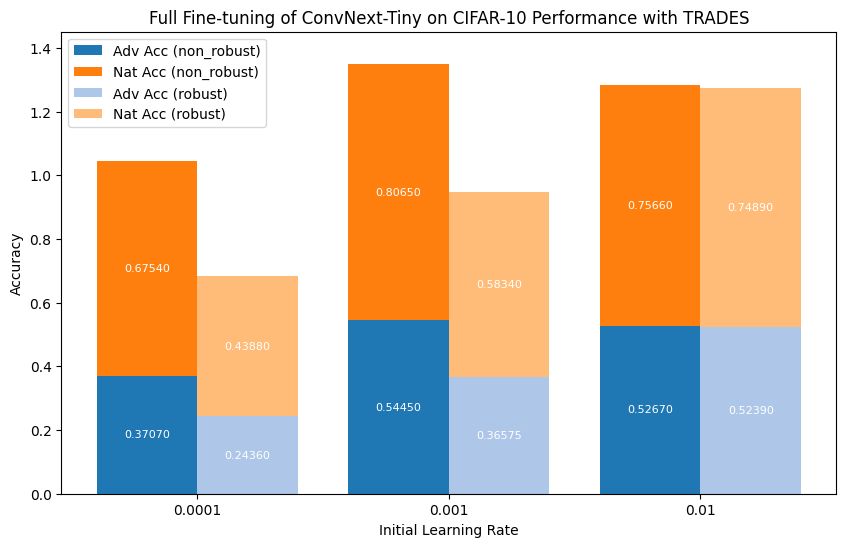

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

# Create the DataFrame with your data
data = {
    'init_lr': [0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01],
    'pre_trained': ['non_robust', 'robust', 'non_robust', 'robust', 'non_robust', 'robust'],
    'adv_acc': [0.37070, 0.24360, 0.54450, 0.36575, 0.52670, 0.52390],
    'nat_acc': [0.6754, 0.4388, 0.8065, 0.5834, 0.7566, 0.7489]
}
df = pd.DataFrame(data)

# Convert init_lr to string to use as x labels
df['init_lr'] = df['init_lr'].astype(str)

# Get unique values for init_lr and pre_trained
init_lr_values = df['init_lr'].unique()
pre_trained_values = df['pre_trained'].unique()

# x positions for each group
x = np.arange(len(init_lr_values))

# Width of a bar
total_width = 0.8
num_bars = len(pre_trained_values)
bar_width = total_width / num_bars

fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for clarity
colors = {'adv_acc': ['#1f77b4', '#aec7e8'], 'nat_acc': ['#ff7f0e', '#ffbb78']}

# Plotting each bar
for i, pre_trained in enumerate(pre_trained_values):
    # Positions for each bar
    positions = x - total_width/2 + bar_width/2 + i*bar_width
    # Filter data for the current pre_trained type
    df_pre = df[df['pre_trained'] == pre_trained]
    # Extract adv_acc and nat_acc values in the order of init_lr_values
    adv_acc = [df_pre[df_pre['init_lr'] == lr]['adv_acc'].values[0] for lr in init_lr_values]
    nat_acc = [df_pre[df_pre['init_lr'] == lr]['nat_acc'].values[0] for lr in init_lr_values]
    # Plot the stacked bars
    adv_bar = ax.bar(positions, adv_acc, bar_width, color=colors['adv_acc'][i], label=f'Adv Acc ({pre_trained})')
    nat_bar = ax.bar(positions, nat_acc, bar_width, bottom=adv_acc, color=colors['nat_acc'][i], label=f'Nat Acc ({pre_trained})')
    # Add text labels
    for j in range(len(positions)):
        # For adv_acc segment
        if adv_acc[j] > 0:
            ax.text(positions[j], adv_acc[j]/2, f'{adv_acc[j]:.5f}', ha='center', va='center', color='white', fontsize=8)
        # For nat_acc segment
        if nat_acc[j] > 0:
            total_height = adv_acc[j] + nat_acc[j]
            ax.text(positions[j], adv_acc[j] + nat_acc[j]/2, f'{nat_acc[j]:.5f}', ha='center', va='center', color='white', fontsize=8)

# Remove duplicate labels in legend
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(init_lr_values)
ax.set_xlabel('Initial Learning Rate')
ax.set_ylabel('Accuracy')
ax.set_title('Full Fine-tuning of ConvNext-Tiny on CIFAR-10 Performance with TRADES')

# Adjust y-axis limit to accommodate labels
ax.set_ylim(0, df['adv_acc'].max() + df['nat_acc'].max() + 0.1)

# Display the plot
plt.show()

